# Correction of practice 10

In [22]:
import numpy as np
import sklearn.linear_model as skmod
import matplotlib.pyplot as plt

In [6]:
x1 = [6, 10, 2, 3, 4, 0, 7, 8, 9, 1]
y = [130, 21, 43, 76, 105, 3, 167, 162, 91, 15]
arr_x1 = np.array(x1).reshape(-1,1)
arr_y = np.array(y).reshape(-1,1)
arr_x2 = arr_x1**2
arr_x3 = arr_x1**3
print(arr_x2)

[[ 36]
 [100]
 [  4]
 [  9]
 [ 16]
 [  0]
 [ 49]
 [ 64]
 [ 81]
 [  1]]


In [25]:
model = skmod.LinearRegression().fit(arr_x1, arr_y)
print("y ' = {:.2f}*x + {:.2f} and R2 = {:.3f}".format(model.coef_[0][0], 
                                       model.intercept_[0],
                                            model.score(arr_x1, arr_y)))

y ' = 8.71*x + 37.75 and R2 = 0.256


In [26]:
#coef 2:
arr_x = np.hstack([arr_x1, arr_x2])
model2 = skmod.LinearRegression().fit(arr_x, arr_y)
print("y ' = {:.2f}*x + {:.2f}*x**2+ {:.2f} and R2 = {:.3f}".format(model2.coef_[0][0],
                                                                    model2.coef_[0][1],
                                                                   model2.intercept_[0],
                                                                    model2.score(arr_x, arr_y)))

y ' = 56.77*x + -4.81*x**2+ -29.53 and R2 = 0.787


In [27]:
#coef 3:
arr_x = np.hstack([arr_x1, arr_x2, arr_x3])
model3 = skmod.LinearRegression().fit(arr_x, arr_y)
print("y ' = {:.2f}*x + {:.2f}*x**2+ {:.2f}*x**3+ {:.2f} and R2 = {:.3f}".format(model3.coef_[0][0],
                                                                    model3.coef_[0][1],
                                                                    model3.coef_[0][2],
                                                                   model3.intercept_[0],
                                                                    model3.score(arr_x, arr_y)))

y ' = 1.47*x + 9.70*x**2+ -0.97*x**3+ 5.27 and R2 = 0.965


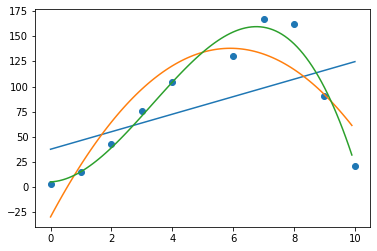

In [31]:
plt.scatter(arr_x1, arr_y)
plt.plot([0,10], model.predict(np.array([[0], [10]])))
x_for_plot = np.arange(0,10,0.1).reshape(-1,1)
x2_for_plot = x_for_plot**2
plt.plot(x_for_plot, model2.predict(np.hstack([x_for_plot, x2_for_plot])))
x3_for_plot = x_for_plot**3
plt.plot(x_for_plot, model3.predict(np.hstack([x_for_plot, x2_for_plot, x3_for_plot])))

# Lecture 11: Machine Learning III

In [56]:
#import some package
import numpy as np
import sklearn.linear_model as skmod
import sklearn.preprocessing as skprepro
import sklearn.model_selection as sksel


## The polynomial features object

In [33]:
#Create data and reshape it
x1 = [6, 10, 2, 3, 4, 0, 7, 8, 9, 1]
y = [130, 21, 43, 76, 105, 3, 167, 162, 91, 15]
arr_x1 = np.array(x1).reshape(-1,1)
arr_y = np.array(y).reshape(-1,1)


In [41]:
#Create the polynomial feature object from the preprocessing module
#PolynomialFeatures() function
#choose the degree and don't include bias
poly3 = skprepro.PolynomialFeatures(degree = 3, include_bias = False)

In [42]:
#Transform your data into fetaures of degree two, fit_transform() function
print(poly3.fit_transform(arr_x1))

[[   6.   36.  216.]
 [  10.  100. 1000.]
 [   2.    4.    8.]
 [   3.    9.   27.]
 [   4.   16.   64.]
 [   0.    0.    0.]
 [   7.   49.  343.]
 [   8.   64.  512.]
 [   9.   81.  729.]
 [   1.    1.    1.]]


In [49]:
#Your turn (10 minutes)
#From the data of practice, make a polynomial 
#regression of degree 8 in one line
#print the coef of the model

x1 = [6, 10, 2, 3, 4, 0, 7, 8, 9, 1]
y = [130, 21, 43, 76, 105, 3, 167, 162, 91, 15]
arr_x1 = np.array(x1).reshape(-1,1)
arr_y = np.array(y).reshape(-1,1)
#1 line to create the Polynomial feature obejct:
poly8 = skprepro.PolynomialFeatures(8, include_bias = False)
#1 line to create model and fit:
model = skmod.LinearRegression().fit(poly8.fit_transform(arr_x1), arr_y)
#1 line to print:
print(model.coef_)

[[ 4.64288632e+01 -8.12079635e+01  6.74485405e+01 -2.38710248e+01
   4.20411268e+00 -3.74085602e-01  1.49834019e-02 -1.72233273e-04]]


## Train and test set

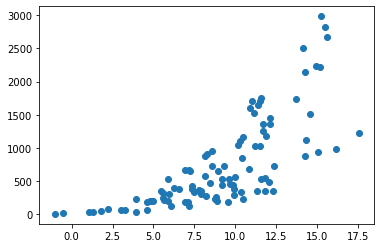

In [71]:
#let's create data, you can check this code at home
data_x = np.random.normal(9, 4, 100)
data_y = np.random.randint(20,180, size = (len(data_x)))/100*(data_x*data_x*8 + 2*data_x + 5)
plt.scatter(data_x, data_y)
data_x = data_x.reshape(-1,1)
data_y = data_y.reshape(-1,1)
# print(data_x)
# print(data_y)

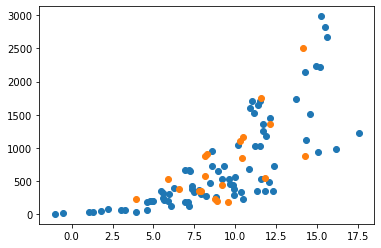

In [72]:
#Let's keep 20 % of our data aside
data_x_train = data_x[:80]
data_x_test = data_x[80:]
data_y_train = data_y[:80]
data_y_test = data_y[80:]
plt.scatter(data_x_train, data_y_train)
plt.scatter(data_x_test, data_y_test)

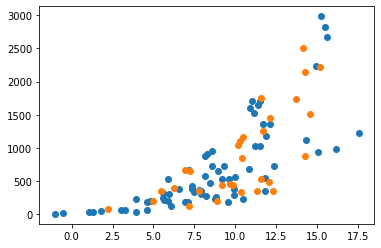

In [118]:
#choose a test and train set with scikit-learn:
#import sklearn.model_selection and use the train_test_split() function
#The order is train/test, train/test
data_x_train, data_x_test, data_y_train, data_y_test =\
                    sksel.train_test_split(data_x, data_y, train_size = 0.7,
                                           shuffle = True)

plt.scatter(data_x_train, data_y_train)
plt.scatter(data_x_test, data_y_test)

In [119]:
#Let's use the Polynomial transform of the sklearn.preprocessing module
poly2 = skprepro.PolynomialFeatures(2, include_bias = False)

In [120]:
#let's make our regression of degree 2
model2 = skmod.LinearRegression().fit(poly2.fit_transform(data_x_train), data_y_train)

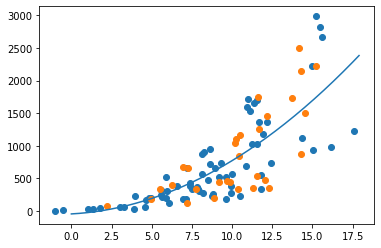

In [121]:
#Let's plot our result

plt.scatter(data_x_train, data_y_train)
plt.scatter(data_x_test, data_y_test)
plt.plot(np.arange(0,18,0.1), model2.predict(poly2.fit_transform(np.arange(0,18,0.1).reshape(-1,1))))

In [122]:
#Let's do for all regression for degree 8
poly8 = skprepro.PolynomialFeatures(8, include_bias = False)
model8 = skmod.LinearRegression().fit(poly8.fit_transform(data_x_train), data_y_train)


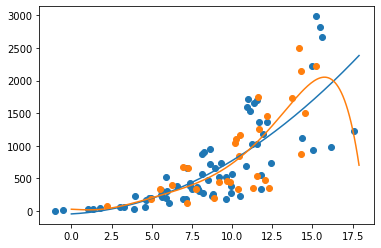

In [123]:
#Let's plot all models

plt.scatter(data_x_train, data_y_train)
plt.scatter(data_x_test, data_y_test)
plt.plot(np.arange(0,18,0.1), model2.predict(poly2.fit_transform(np.arange(0,18,0.1).reshape(-1,1))))
plt.plot(np.arange(0,18,0.1), model8.predict(poly8.fit_transform(np.arange(0,18,0.1).reshape(-1,1))))

In [124]:
#Result of our model of the training set: the score function 
#(1 = perfect fitting, 0 = no fitting at all)
print('degree 2')
print(model2.score(poly2.fit_transform(data_x_train), data_y_train))
print(model2.score(poly2.fit_transform(data_x_test), data_y_test))
print('degree 8')
print(model8.score(poly8.fit_transform(data_x_train), data_y_train))
print(model8.score(poly8.fit_transform(data_x_test), data_y_test))

degree 2
0.6137066862027127
0.5783182662960771
degree 8
0.6721057869243501
0.6002921477885151


In [ ]:
#Result of our model of the test set: the score function


In [ ]:
'''
Result of several runs

degree 2
0.5810801559311727
0.6677528189577515
degree 8
0.6317591600385895
0.6777356506001482

degree 2
0.5673439853386342
0.7271983459468221
degree 8
0.6148809338160421
0.7803378758994521

degree 2
0.6709922126845423
-0.0361537820122404
degree 8
0.7774901932565357
-1.1143734950432234

'''

## Values scaling

### The logic behind scaling

In [125]:
#Create two features with different size with random (use function np.random.randint())
data_x1 = np.random.randint(10000, 20000, size = (20))
data_x2 = np.random.randint(0, 100, size = (20))
print(data_x1)
print(data_x2)

[18803 10559 11934 18095 18080 10496 14335 16518 13828 12291 16369 11844
 13451 17829 17449 12730 17205 14099 16906 10281]
[63  7 63 35  3 16 53 46 61 97 48 71 55  9 46 12 58 63 93 12]


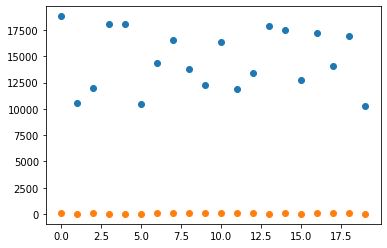

In [126]:
#Let's try to plot it together
plt.scatter(range(0,20), data_x1)
plt.scatter(range(0,20), data_x2)

In [129]:
#We can scale our data with normalization ((x - xmin)/(xmax - xmin))
data_x1_norm = (data_x1 - min(data_x1))/(max(data_x1) - min(data_x1))
data_x2_norm = (data_x2 - min(data_x2))/(max(data_x2) - min(data_x2))

print(data_x1_norm)
print(data_x2_norm)

[1.         0.03262145 0.19396855 0.91692091 0.91516076 0.02522882
 0.47570993 0.73187045 0.41621685 0.23586013 0.71438629 0.18340765
 0.37197841 0.88570758 0.84111711 0.28737386 0.81248533 0.4480169
 0.77739967 0.        ]
[0.63829787 0.04255319 0.63829787 0.34042553 0.         0.13829787
 0.53191489 0.45744681 0.61702128 1.         0.4787234  0.72340426
 0.55319149 0.06382979 0.45744681 0.09574468 0.58510638 0.63829787
 0.95744681 0.09574468]


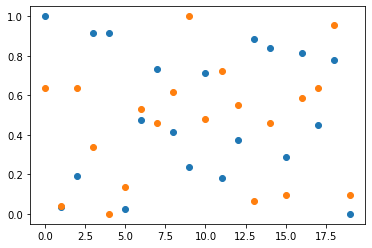

In [130]:
#Let's plot it again

plt.scatter(range(0,20), data_x1_norm)
plt.scatter(range(0,20), data_x2_norm)

In [132]:
#We can scale our data with standardization
data_x1_stan = (data_x1 - np.mean(data_x1))/np.std(data_x1)
data_x2_stan = (data_x2 - np.mean(data_x2))/np.std(data_x2)
print(data_x1_stan)
print(data_x2_stan)

[ 1.48054309 -1.4620537  -0.97126397  1.227831    1.22247693 -1.4845408
 -0.11425585  0.66493978 -0.29522341 -0.8438371   0.61175602 -1.00338839
 -0.42978903  1.13288549  0.99724905 -0.68714133  0.91015618 -0.19849322
  0.80343172 -1.56128247]
[ 0.63989965 -1.4136465   0.63989965 -0.38687343 -1.56032836 -1.0836123
  0.27319498  0.01650171  0.56655871  1.88669552  0.08984264  0.93326338
  0.34653591 -1.34030556  0.01650171 -1.23029416  0.45654731  0.63989965
  1.74001365 -1.23029416]


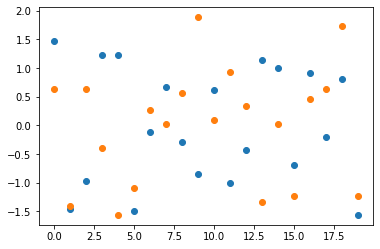

In [133]:
#we can now plot our data

plt.scatter(range(0,20), data_x1_stan)
plt.scatter(range(0,20), data_x2_stan)

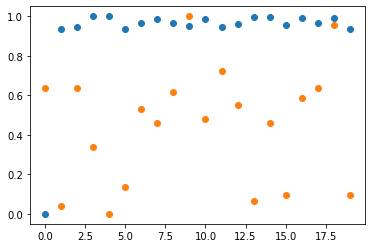

(-1.1, 1.1)

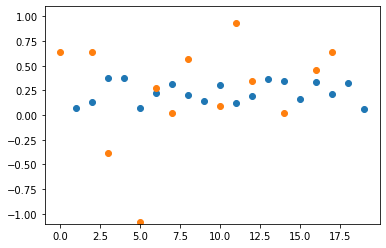

In [139]:
#The difference between normalisation and standardization when there is outliers
#Let's plot it
data_x1[0] = -100000

data_x1_norm = (data_x1 - min(data_x1))/(max(data_x1) - min(data_x1))
data_x2_norm = (data_x2 - min(data_x2))/(max(data_x2) - min(data_x2))
plt.scatter(range(0,20), data_x1_norm)
plt.scatter(range(0,20), data_x2_norm)
plt.show()

data_x1_stan = (data_x1 - np.mean(data_x1))/np.std(data_x1)
data_x2_stan = (data_x2 - np.mean(data_x2))/np.std(data_x2)

plt.scatter(range(0,20), data_x1_stan)
plt.scatter(range(0,20), data_x2_stan)
plt.ylim(-1.1,1.1)

### The scikit-learn object

In [140]:
#Create the scaler object StandardScaler() object
scaler = skprepro.StandardScaler()


In [141]:
#prepare our data: 2 columns because 2 features
data_x1 = np.random.randint(10000, 20000, size = (20))
data_x2 = np.random.randint(0, 100, size = (20))
x = np.hstack([data_x1.reshape(-1,1), data_x2.reshape(-1,1)])
print(x)

[[19185    21]
 [12626    81]
 [11392    93]
 [16771    25]
 [13065    50]
 [10030    76]
 [12776    78]
 [15119    33]
 [11249    64]
 [17445    51]
 [19314    20]
 [15219    91]
 [13995     9]
 [12457    50]
 [17151    99]
 [18021    92]
 [10719    68]
 [14868    44]
 [18365    52]
 [16293    52]]


In [151]:
#use it on your data with the fit(), transform() or fit_transform()
scaler = scaler.fit(x)
x_stan = scaler.transform(x)
print(x_stan)
#predict for 10000, 5
x_predict = scaler.transform(np.array([[100, 100]]))
print(x_predict)

[[ 1.5339615  -1.38228178]
 [-0.76207991  0.89307918]
 [-1.19405355  1.34815137]
 [ 0.68891744 -1.23059105]
 [-0.60840372 -0.28252399]
 [-1.67083483  0.70346576]
 [-0.70957096  0.77931113]
 [ 0.11061886 -0.92720959]
 [-1.24411209  0.24839357]
 [ 0.92485766 -0.2446013 ]
 [ 1.5791192  -1.42020446]
 [ 0.14562483  1.272306  ]
 [-0.28284822 -1.83735397]
 [-0.82124    -0.28252399]
 [ 0.82194012  1.57568746]
 [ 1.12649204  1.31022868]
 [-1.42964372  0.4000843 ]
 [ 0.02275388 -0.51006008]
 [ 1.24691257 -0.20667862]
 [ 0.52158892 -0.20667862]]
[[-5.14692742  1.61361014]]


In [155]:
#Use inverse_transform method to come back for standardized data to real data
print(scaler.inverse_transform(np.array([[1,0.1]])))

[[17659.65578956    60.08694425]]


In [161]:
#YOUR TURN (10 minutes)
#On the file in Teams (use copy past to transfer it in python), 
#tranform the three lists in a 10*3 matrix of standardized features
l1 = [22, 85, 96, 81, 68, 97, 29, 61, 73, 86]
l2 = [1489022, 1073767, 1975250, 1493073, 1063635, 1017921, 1206827, 1217274, 1933018, 1325618]
l3 = [-99.67, -99.37, -99.08, -99.54, -99.8, -99.21, -99.73, -99.78, -99.6, -99.48]
l1 = np.array(l1).reshape(-1,1)
l2 = np.array(l2).reshape(-1,1)
l3 = np.array(l3).reshape(-1,1)
l = np.hstack([l1,l2,l3])
print(l)
scaler_f = skprepro.StandardScaler()
l_stan = scaler_f.fit_transform(l)
print(l_stan)

[[ 2.200000e+01  1.489022e+06 -9.967000e+01]
 [ 8.500000e+01  1.073767e+06 -9.937000e+01]
 [ 9.600000e+01  1.975250e+06 -9.908000e+01]
 [ 8.100000e+01  1.493073e+06 -9.954000e+01]
 [ 6.800000e+01  1.063635e+06 -9.980000e+01]
 [ 9.700000e+01  1.017921e+06 -9.921000e+01]
 [ 2.900000e+01  1.206827e+06 -9.973000e+01]
 [ 6.100000e+01  1.217274e+06 -9.978000e+01]
 [ 7.300000e+01  1.933018e+06 -9.960000e+01]
 [ 8.600000e+01  1.325618e+06 -9.948000e+01]]
[[-1.93765385  0.33481781 -0.62382688]
 [ 0.61615771 -0.93512067  0.67581245]
 [ 1.06206131  1.82180687  1.93213047]
 [ 0.45401094  0.34720663 -0.06064984]
 [-0.07296604 -0.96610649 -1.18700392]
 [ 1.10259801 -1.10590966  1.36895343]
 [-1.65389701 -0.52819477 -0.88375474]
 [-0.35672288 -0.49624561 -1.1003613 ]
 [ 0.12971741  1.6926524  -0.3205777 ]
 [ 0.6566944  -0.16490652  0.19927803]]


In [165]:
#YOUR TURN (10 minutes)
#Make a linear regression with the three features (l1, l2 and l3) and the label (l4)
#with standardized features and label
# what is the prediction of both model for fatures: [30, 1600000, -99.5]
label = np.array([-182, -254.3,  -71  , -172, -261 , -262, -237, -231, -85, -204]).reshape(-1,1)
scaler_l = skprepro.StandardScaler()
label_stan = scaler_l.fit_transform(label)
model = skmod.LinearRegression().fit(l_stan, label_stan)
x_predict = [30, 1600000, -99.5]
y_predict_stan = model.predict(scaler_f.transform(np.array([x_predict])))
print(scaler_l.inverse_transform(y_predict_stan))

[[-157.47748455]]
